# Import Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
%matplotlib inline
import seaborn as sns
from datetime import datetime
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
print('='*60)
print('1. LOADING AND EXPLORING DATA')
print('='*60)

1. LOADING AND EXPLORING DATA


In [4]:
df=pd.read_csv(r'archive\Mr Beast YT data.csv')
df

,title,video_id,Publishe_date,published_time,views,likes,comments,thumbnails,duration_sec,status,description
0,I Raced Noah Lyles,LyFMbY-c_Lc,11/14/2025,05:00:01 PM,1276115,37138,1516,https://i.ytimg.com/vi/LyFMbY-c_Lc/default.jpg,32,#shorts,NaN
1,100 People Vs Worldâ€™s Biggest Trap!,3RmOvxilbPM,11/08/2025,05:00:00 PM,57644424,1440499,65512,https://i.ytimg.com/vi/3RmOvxilbPM/default.jpg,1843,#video,The traps got crazier and crazier that i didnt...
2,Giving Trick-or-Treaters Weirder and Weirder G...,R7MkZL5i3FQ,11/07/2025,05:00:05 PM,93071903,1171847,10141,https://i.ytimg.com/vi/R7MkZL5i3FQ/default.jpg,27,#shorts,NaN
3,MrBeast Lab Disaster!,26QQE7EsnLA,11/03/2025,05:00:01 PM,20757920,927749,13726,https://i.ytimg.com/vi/26QQE7EsnLA/default.jpg,67,#video,NaN
4,Can We Stop World's Best Tennis Player,PryTbmudhS8,10/31/2025,04:00:02 PM,52808662,985868,9218,https://i.ytimg.com/vi/PryTbmudhS8/default.jpg,23,#shorts,NaN
...,...,...,...,...,...,...,...,...,...,...,...
903,Most Epic minecraft skin EVER (Psy),7qj3nuF9Dzw,01/13/2013,01:59:21 AM,1282454,44910,3664,https://i.ytimg.com/vi/7qj3nuF9Dzw/default.jpg,31,#shorts,Psy in minecraft!!! drop a like for psy's mo...
904,More birds IN MINECRAFT!!,Y74b7WlcEpk,01/12/2013,11:35:45 PM,1405954,49771,3850,https://i.ytimg.com/vi/Y74b7WlcEpk/default.jpg,126,#video,Basically what this mod does is adds more bird...
905,Boxy item mod Minecraft. EPIC,Z8nEEdXTaX0,01/12/2013,10:34:11 PM,1655955,58782,4340,https://i.ytimg.com/vi/Z8nEEdXTaX0/default.jpg,90,#video,At the begining i said i was mrbeast6000.... i...
906,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,jP82d277Cc8,03/09/2012,11:29:03 PM,6322231,0,9477,https://i.ytimg.com/vi/jP82d277Cc8/default.jpg,239,#video,One of the coolest mods i have ever seen\n\nMo...


In [5]:
df.columns

Index(['title', 'video_id', 'Publishe_date', 'published_time', 'views',
       'likes', 'comments', 'thumbnails', 'duration_sec', 'status',
       'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           908 non-null    object
 1   video_id        908 non-null    object
 2   Publishe_date   908 non-null    object
 3   published_time  908 non-null    object
 4   views           908 non-null    int64 
 5   likes           908 non-null    int64 
 6   comments        908 non-null    int64 
 7   thumbnails      908 non-null    object
 8   duration_sec    908 non-null    int64 
 9   status          908 non-null    object
 10  description     789 non-null    object
dtypes: int64(4), object(7)
memory usage: 78.2+ KB


In [7]:
df.isnull().sum()

title               0
video_id            0
Publishe_date       0
published_time      0
views               0
likes               0
comments            0
thumbnails          0
duration_sec        0
status              0
description       119
dtype: int64

In [8]:
print('\n'+'='*60)
print('2. CLEANING AND PREPROCESSING DATA')
print('='*60)


2. CLEANING AND PREPROCESSING DATA


In [9]:
df_clean=df.copy()

In [10]:
df_clean['description'].fillna('',inplace=True)

In [11]:
# Clean and convert data columns

df_clean['Publishe_date'] = pd.to_datetime(df_clean['Publishe_date'], format='%m/%d/%Y')
df_clean['published_datetime'] = pd.to_datetime(df_clean['Publishe_date'].astype(str) + ' ' + df_clean['published_time'])

In [12]:
# Extract datetime features

df_clean['year']=df_clean['Publishe_date'].dt.year
df_clean['month']=df_clean['Publishe_date'].dt.month
df_clean['day']=df_clean['Publishe_date'].dt.day
df_clean['day_of_week']=df_clean['Publishe_date'].dt.day_name()
df_clean['is_weekend']=df_clean['day_of_week'].isin(['Saturday','Sunday'])


In [13]:
# Clean numeric columns
# Remove commas from numbers and covert to numeric

for col in ['views','likes','comments']:
    if df_clean[col].dtype=='object':
        df_clean[col]=df_clean[col].astype(str).str.replace(',','').astype(float)

In [14]:
# Covert duration to minutes

df_clean['duration_min']=df_clean['duration_sec']/60

In [15]:
# Clean status column

df_clean['status']=df_clean['status'].str.replace('#','')

In [16]:
# Extract video type

def extract_video_type(title,df):
    title_lower=str(title).lower()
    # check if its marked as shorts in status
    if 'shorts' in title_lower or 'short' in df.loc[df['title']==title,'status'].values[0].lower():
        return 'Shorts'
    else:
        return 'Video'
df_clean['video_type']=df_clean.apply(lambda x: extract_video_type(x['title'],df_clean),axis=1)
    

In [17]:
# Create engagement metrics

df_clean['like_ratio']=df_clean['likes']/df_clean['views']
df_clean['comment_ratio']=df_clean['comments']/df_clean['views']
df_clean['engagement_rate']=(df_clean['likes']+df_clean['comments'])/df_clean['views']

In [18]:
# Extract monetary value from titles

def extract_monetary_value(title):
    title=str(title)
    patterns=[
        r'\$(\d+\.?\d*)\s*(?:million|M|billion|B|k|K)?',
        r'(\d+\.?\d*)\s*(?:million|M|billion|B)\s+dollars',
        r'win\s*\$(\d+\.?\d*)\s*(?:million|M|billion|B|k|K)?',
    ]
    for pattern in patterns:
        matches=re.findall(pattern,title,re.IGNORECASE)
        if matches:
            value=float(matches[0])
            if 'million' in title.lower() or 'M' in title.upper():
                return value * 1000000
            elif 'billion' in title.lower() or 'B' in title.upper():
                return value * 1000000000
            elif 'k' in title.lower() or 'K' in title.upper():
                return value * 1000
            else:
                return value
    return 0

In [19]:
df_clean['monetary_value']=df_clean['title'].apply(extract_monetary_value)
print('Data cleaning completed!')
print(f'Cleaned dataset shape:{df_clean.shape}')

Data cleaning completed!
Cleaned dataset shape:(908, 23)


In [20]:
print('\n'+'='*60)
print('3. EXPLORATORY DATA ANALYSIS - VISUALIZATIONS')
print('='*60)


3. EXPLORATORY DATA ANALYSIS - VISUALIZATIONS


### 1.) Views Distribution

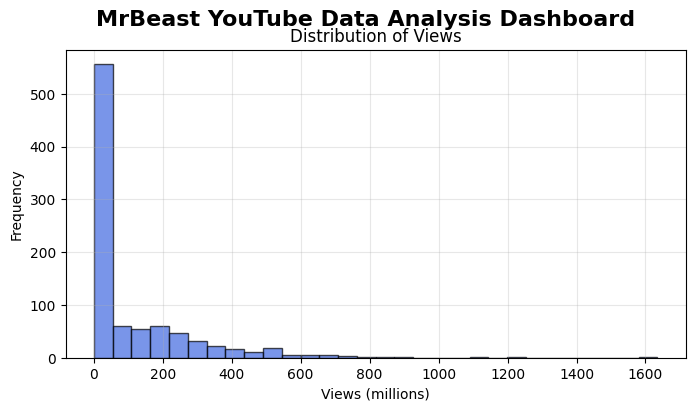

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,4))
fig.suptitle('MrBeast YouTube Data Analysis Dashboard', fontsize=16, fontweight='bold')
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df_clean['views']/1e6,bins=30, edgecolor='black',
         alpha=0.7, color='royalblue')
ax1.set_xlabel('Views (millions)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Views')
ax1.grid(True, alpha=0.3)
plt.show()


### 2.) Video type distribution

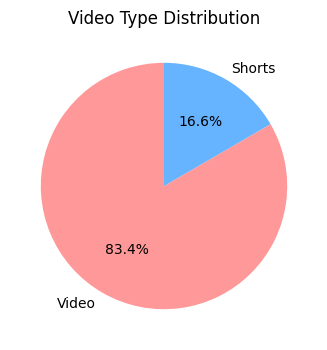

In [22]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 4))
gs = GridSpec(1, 2) 

ax2 = fig.add_subplot(gs[0, 1])
video_type_counts=df_clean['video_type'].value_counts()
ax2.pie(video_type_counts.values,labels=video_type_counts.index,autopct='%1.1f%%',
        startangle=90,colors=['#ff9999','#66b3ff'])
ax2.set_title('Video Type Distribution')
plt.show()

### 3.) Views over time

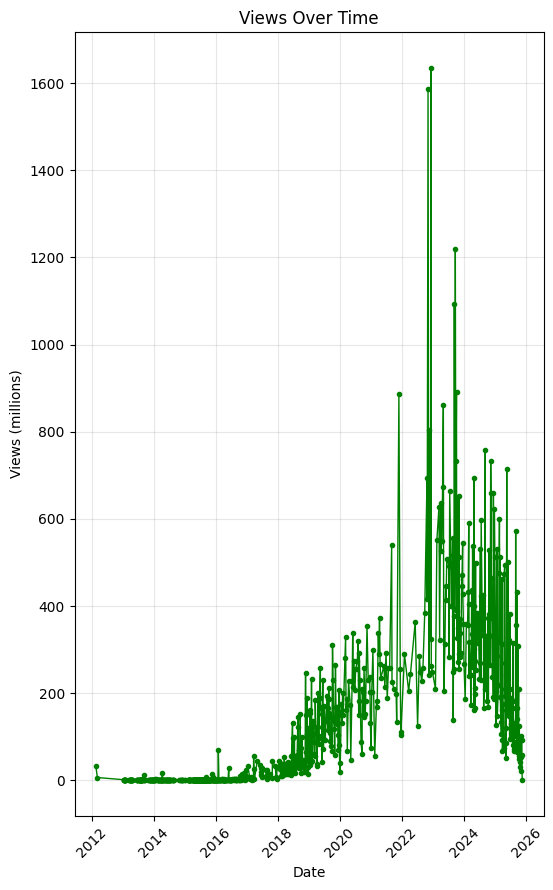

In [23]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))
gs = GridSpec(1,3)

ax3 = fig.add_subplot(gs[0, 2])
df_clean = df_clean.sort_values('published_datetime')

ax3.plot(
    df_clean['published_datetime'],
    df_clean['views'] / 1e6,
    marker='o',
    markersize=3,
    linewidth=1,
    color='green'
)
ax3.set_xlabel('Date')
ax3.set_ylabel('Views (millions)')
ax3.set_title('Views Over Time')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.) Top 10 most viewed videos

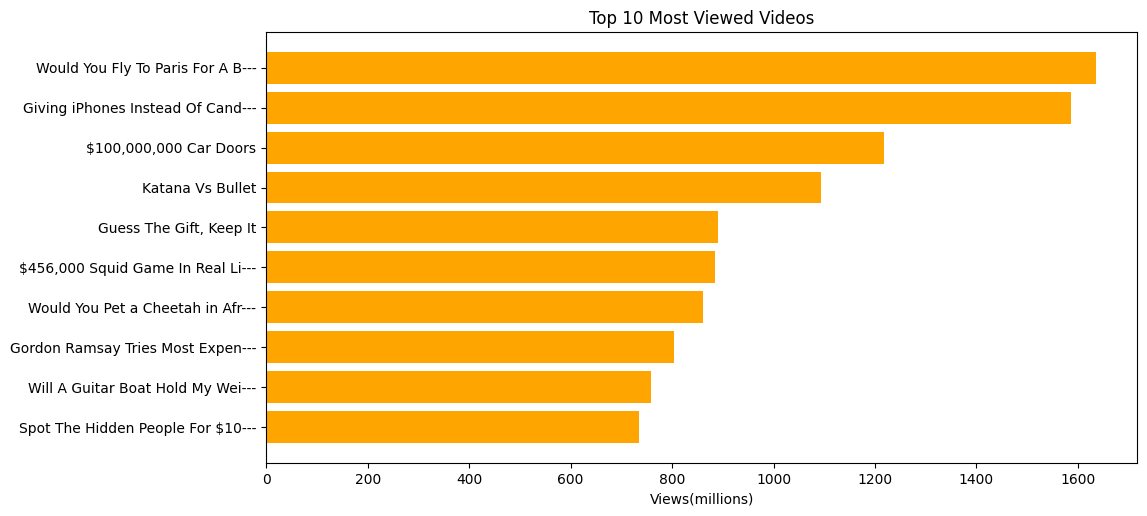

In [24]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
gs = GridSpec(2,3, height_ratios=[1, 1.2])

ax4=fig.add_subplot(gs[1,0:2])
top_10_views=df_clean.nlargest(10,'views')[['title','views']].copy()
top_10_views['views_millions']=top_10_views['views']/1e6
top_10_views['short_title']=top_10_views['title'].apply(lambda x:x[:30]+'---'
                                                        if len(x)>30 else x)
bars=ax4.barh(range(len(top_10_views)),top_10_views['views_millions'],color='orange')
ax4.set_yticks(range(len(top_10_views)))
ax4.set_yticklabels(top_10_views['short_title'])
ax4.set_xlabel('Views(millions)')
ax4.set_title('Top 10 Most Viewed Videos')
ax4.invert_yaxis()
plt.tight_layout()
plt.show()

### 5.) Engagement rate by video type

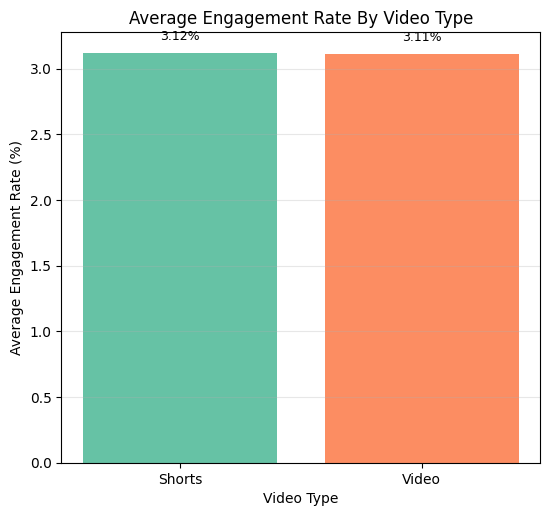

In [25]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,9))
gs = GridSpec(2, 3, height_ratios=[1, 1.2])

ax5 = fig.add_subplot(gs[1, 2])

engagement_by_type = (
    df_clean.groupby('video_type')['engagement_rate']
    .mean()
)
bars5 = ax5.bar(
    engagement_by_type.index,
    engagement_by_type.values * 100,
    color=plt.cm.Set2(range(len(engagement_by_type)))
)
ax5.set_xlabel('Video Type')
ax5.set_ylabel('Average Engagement Rate (%)')
ax5.set_title('Average Engagement Rate By Video Type')
for i, v in enumerate(engagement_by_type.values * 100):
    ax5.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontsize=9)

ax5.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 6.) Duration vs Views scatter plot

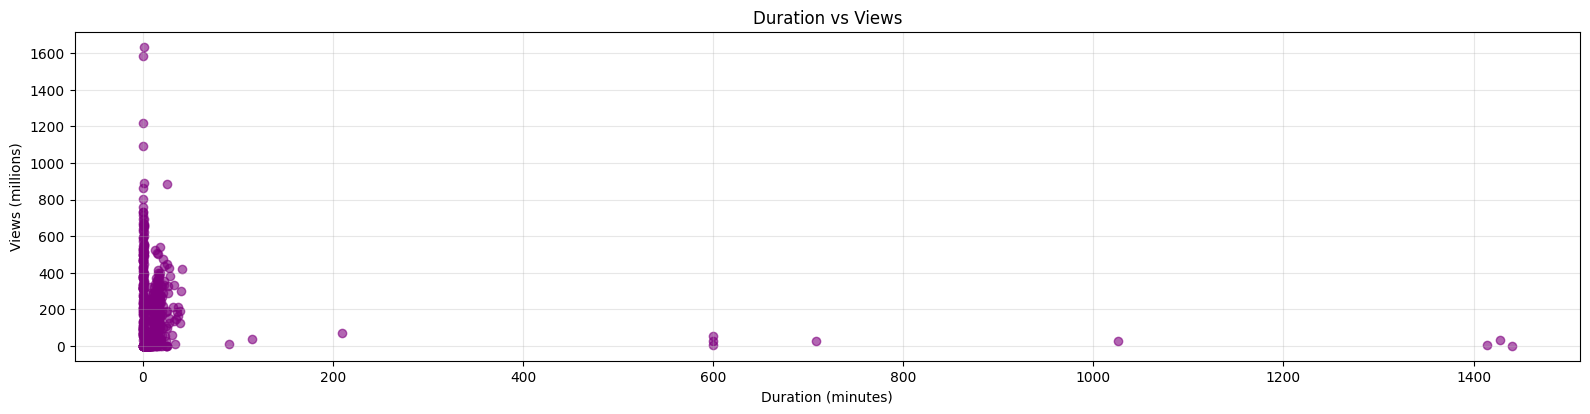

In [26]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, height_ratios=[1, 1.2, 1])

ax6 = fig.add_subplot(gs[2, 0:3])
ax6.scatter(
    df_clean['duration_min'],
    df_clean['views'] / 1e6,
    alpha=0.6,
    color='purple'
)
ax6.set_xlabel('Duration (minutes)')
ax6.set_ylabel('Views (millions)')
ax6.set_title('Duration vs Views')
ax6.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.) Monthly upload frequency

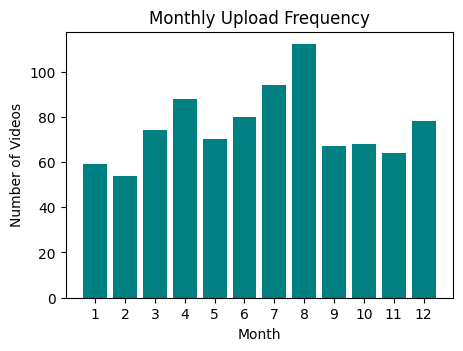

In [27]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 14))
gs = GridSpec(3,3,
    height_ratios=[1, 1.2, 1],
    hspace=0.4,
    wspace=0.3
)
ax7=fig.add_subplot(gs[2,1])
monthly_counts=df_clean.groupby('month').size()
ax7.bar(monthly_counts.index,monthly_counts.values,color='teal')
ax7.set_xlabel('Month')
ax7.set_ylabel('Number of Videos')
ax7.set_title('Monthly Upload Frequency')
ax7.set_xticks(range(1, 13))
plt.tight_layout()
plt.show()

### 8.) Likes vs Views correlation 

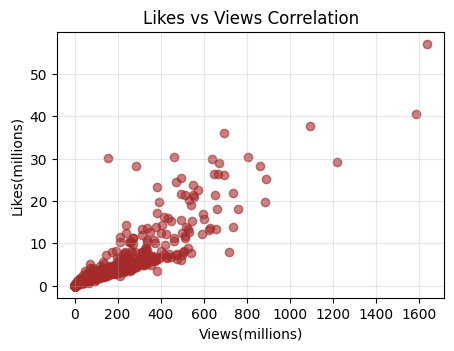

In [28]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,14))
gs = GridSpec(3,3,
    height_ratios=[1, 1.2, 1],
    hspace=0.4,
    wspace=0.3
)
ax8=fig.add_subplot(gs[2,2])
ax8.scatter(df_clean['views']/1e6,df_clean['likes']/1e6,
            alpha=0.6,color='brown')
ax8.set_xlabel('Views(millions)')
ax8.set_ylabel('Likes(millions)')
ax8.set_title('Likes vs Views Correlation')
ax8.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

### 9.) Day of week analysis

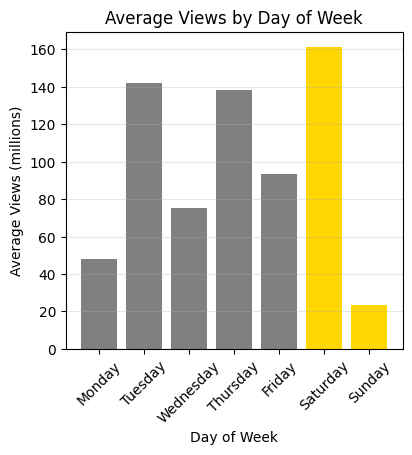

In [29]:
fig = plt.figure(figsize=(20,14))
gs = GridSpec(3,4,figure=fig)

ax9 = fig.add_subplot(gs[2, 3])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_views = (
    df_clean.groupby('day_of_week')['views']
    .mean()
    .reindex(day_order) / 1e6
)
ax9.bar(
    range(len(day_views)),
    day_views.values,
    color=['gold' if d in ['Saturday','Sunday'] else 'grey' for d in day_order]
)
ax9.set_xlabel('Day of Week')
ax9.set_ylabel('Average Views (millions)')
ax9.set_title('Average Views by Day of Week')
ax9.set_xticks(range(len(day_order)))
ax9.set_xticklabels(day_order, rotation=45)
ax9.grid(axis='y', alpha=0.3)
plt.show()


### 10.) Correlation heatmap

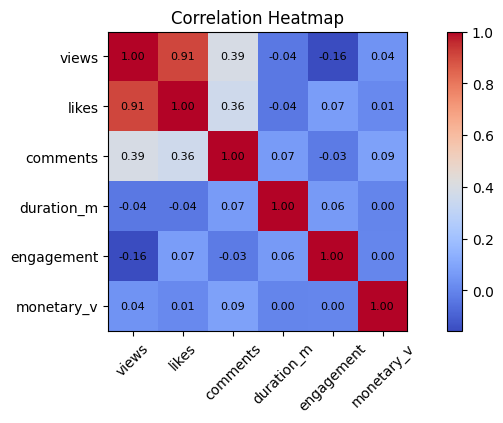

In [30]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(22,18))
gs = GridSpec(4,4,                 
    figure=fig,
    height_ratios=[1, 1.2, 1, 1.3],
    hspace=0.45,
    wspace=0.35
)
ax10=fig.add_subplot(gs[3,:2])
correlation_cols=['views','likes','comments','duration_min','engagement_rate','monetary_value']
corr_matrix=df_clean[correlation_cols].corr()
im=ax10.imshow(corr_matrix,cmap='coolwarm')
ax10.set_xticks(range(len(correlation_cols)))
ax10.set_yticks(range(len(correlation_cols)))
ax10.set_xticklabels([c[:10]for c in correlation_cols],rotation=45)
ax10.set_yticklabels([c[:10]for c in correlation_cols])
ax10.set_title('Correlation Heatmap')
plt.colorbar(im, ax=ax10, fraction=0.046)

for i in range(len(correlation_cols)):
    for j in range(len(correlation_cols)):
        text=ax10.text(j,i,f'{corr_matrix.iloc[i,j]:.2f}',
                       ha='center',va='center',color='black',fontsize=8)
plt.show()

### 11.) Monetary value impact

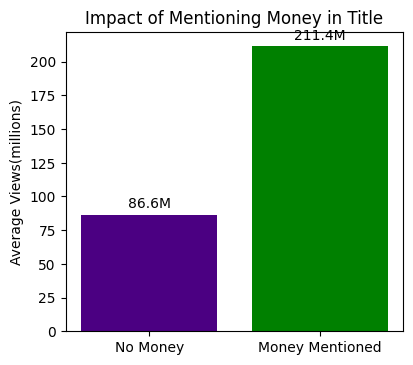

In [31]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(22, 18))
gs = GridSpec(
    4, 4,
    figure=fig,
    height_ratios=[1, 1.2, 1, 1.3],
    hspace=0.45,
    wspace=0.35
)
ax11=fig.add_subplot(gs[3,2])
has_money=df_clean['monetary_value']>0
money_views=df_clean.groupby(has_money)['views'].mean()/1e6
bars11=ax11.bar(['No Money','Money Mentioned'],money_views.values,
                color=['indigo','green'])
ax11.set_ylabel('Average Views(millions)')
ax11.set_title('Impact of Mentioning Money in Title')
for i,v in enumerate(money_views.values):
    ax11.text(i,v+5,f'{v:.1f}M', ha='center')
plt.tight_layout()
plt.show()

In [32]:
print('\n'+'='*60)
print('4. PREDICTIVE MODELLING')
print('='*60)


4. PREDICTIVE MODELLING


In [33]:
# Prepare data for prediction

model_df=df_clean.copy()

In [34]:
# Create features for modeling

model_df['title_length']=model_df['title'].apply(len)
model_df['description_length']=model_df['description'].apply(len)
model_df['has_money']=(model_df['monetary_value']>0).astype(int)
model_df['is_shorts']=(model_df['video_type']=='Shorts').astype(int)

In [35]:
# Encode categorical variables

le_day=LabelEncoder()
model_df['day_of_week_encoded']=le_day.fit_transform(model_df['day_of_week'])

In [36]:
# Define features and target

features=['duration_min','title_length','description_length',
          'has_money','is_shorts','month','day_of_week_encoded',
          'is_weekend','monetary_value']
X=model_df[features]
y=np.log1p(model_df['views'])

In [37]:
# split data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
# Train model
print("\nTraining Random Forest Model...")
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)


Training Random Forest Model...


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Make predictions and evaluate

y_pred=rf_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'\nModel Performance:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {np.sqrt(mse):.4f}')


Model Performance:
Mean Squared Error: 2.7362
R2 Score: 0.7664
RMSE: 1.6542


In [40]:
# Feature importance
feature_importance=pd.DataFrame({
    'feature':features,
    'importance':rf_model.feature_importances_
}).sort_values('importance',ascending=False)

print('\nFeature Importance:')
print('-'*40)
for idx, row in feature_importance.iterrows():
    print(f'{row['feature']:25s}:{row['importance']:.4f}')


Feature Importance:
----------------------------------------
duration_min             :0.5951
description_length       :0.2869
title_length             :0.0353
month                    :0.0292
day_of_week_encoded      :0.0199
is_shorts                :0.0154
monetary_value           :0.0079
is_weekend               :0.0073
has_money                :0.0030


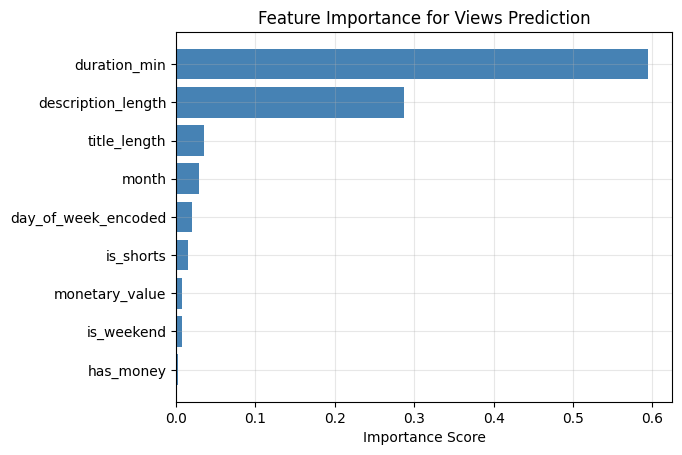

In [41]:
# Visualize feature importance

plt.Figure(figsize=(10,6))
plt.barh(feature_importance['feature'],feature_importance['importance'],color='steelblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Views Prediction')
plt.gca().invert_yaxis()
plt.grid(True,alpha=0.3)
plt.show()

In [42]:
print('\n'+'='*60)
print('5. KEY INSIGHTS AND RECOMMENDATIONS')
print('='*60)


5. KEY INSIGHTS AND RECOMMENDATIONS


### Calculate key metrics

In [43]:
total_videos=len(df_clean)
shorts_count=len(df_clean[df_clean['video_type']=='Shorts'])
regular_count=len(df_clean[df_clean['video_type']=='Video'])

avg_views=df_clean['views'].mean()/1e6
avg_engagement=df_clean['engagement_rate'].mean()*100

### Best performing content

In [44]:
best_video=df_clean.loc[df_clean['views'].idxmax()]
worst_video=df_clean.loc[df_clean['views'].idxmin()]

In [45]:
print(f'\n1. CONTENT OVERVIEW:')
print(f'Total Videos Analysed: {total_videos}')
print(f'Shorts: {shorts_count} ({shorts_count/total_videos*100:.1f}%)')
print(f'Regular Videos: {regular_count} ({regular_count/total_videos*100:.1f}%)')


1. CONTENT OVERVIEW:
Total Videos Analysed: 908
Shorts: 151 (16.6%)
Regular Videos: 757 (83.4%)


In [46]:
print(f'\n2. PERFORMANCE METRICS:')
print(f'Average Views per Video: {avg_views:.1f}million')
print(f'Average Engagement Rate: {avg_engagement:.2f}%')
print(f"Best Video: '{best_video['title'][:40]}...' ({best_video['views']/1e6:.1f}M views)")



2. PERFORMANCE METRICS:
Average Views per Video: 110.3million
Average Engagement Rate: 3.11%
Best Video: 'Would You Fly To Paris For A Baguette?...' (1634.8M views)


In [47]:
print(f'\n3. TEMPORAL INSIGHTS:')
best_month=df_clean.groupby('month')['views'].mean().idxmax()
best_day=df_clean.groupby('day_of_week')['views'].mean().idxmax()
print(f'Best Performing Month: {best_month}')
print(f'Best Performing Day: {best_day}')
print(f"Weekend Performance: {df_clean[df_clean['is_weekend']]['views'].mean()/1e6:.1f}M vs Weekday: {df_clean[~df_clean['is_weekend']]['views'].mean()/1e6:.1f}M")


3. TEMPORAL INSIGHTS:
Best Performing Month: 11
Best Performing Day: Saturday
Weekend Performance: 117.9M vs Weekday: 105.1M


In [53]:
print(f'\n4. CONTENT STRATEGY:')
shorts_views=df_clean[df_clean['video_type']=='Shorts']['views'].mean()/1e6
video_views=df_clean[df_clean['video_type']=='Video']['views'].mean()/1e6
print(f'Shorts Average Views: {shorts_views:.1f}M')
print(f'Regular Videos Average Views: {video_views:.1f}M')
print(f'Videos With Money Mentions: {len(df_clean[df_clean['monetary_value']==1])}')


4. CONTENT STRATEGY:
Shorts Average Views: 332.9M
Regular Videos Average Views: 65.9M
Videos With Money Mentions: 16


In [63]:
print(f'\n5. PREDICTIVE INSIGHTS:')
print(f'Model R2 Score: {r2:.4f}')
print(f'Top 3 Predictive Features:')
for i in range(3):
    print(f"{i+1}. {feature_importance.iloc[i]['feature']} (importance: {feature_importance.iloc[i]['importance']:.3f})")


5. PREDICTIVE INSIGHTS:
Model R2 Score: 0.7664
Top 3 Predictive Features:
1. duration_min (importance: 0.595)
2. description_length (importance: 0.287)
3. title_length (importance: 0.035)


In [64]:
print(f'\n6. ACTIONABLE RECOMMENDATIONS:')
print(f'~> Optimize posting schedule for saturday')
print(f'~> Include specific monetary values in titles')
print(f'~> Maintain mix of Shorts and regular content')
print(f'~> Focus on engagement metrics like engagement rate')
print(f'~> Use weekends for major content releases')


6. ACTIONABLE RECOMMENDATIONS:
~> Optimize posting schedule for saturday
~> Include specific monetary values in titles
~> Maintain mix of Shorts and regular content
~> Focus on engagement metrics like engagement rate
~> Use weekends for major content releases


In [65]:
print(f'\n'+'='*60)
print('6. EXPORT RESULTS')
print('='*60)


6. EXPORT RESULTS


In [66]:
# Export cleaned data
df_clean.to_csv('mrbeast_cleaned_data.csv',index=False)

In [67]:
# Export feature importance
feature_importance.to_csv('feature_importance.csv',index=False)

In [68]:
# Export summary statistics
summary_stats = pd.DataFrame({
    'Metric': ['Total Videos', 'Shorts Count', 'Regular Videos', 'Avg Views (M)', 'Avg Engagement (%)'],
    'Value': [total_videos, shorts_count, regular_count, round(avg_views, 2), round(avg_engagement, 2)]
})
summary_stats.to_csv('summary_statistics.csv', index=False)

print("Files exported successfully:")
print("1. mrbeast_cleaned_data.csv")
print("2. feature_importance.csv")
print("3. summary_statistics.csv")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)

Files exported successfully:
1. mrbeast_cleaned_data.csv
2. feature_importance.csv
3. summary_statistics.csv

ANALYSIS COMPLETE!
